In [82]:
import matplotlib.pyplot as plt
import numpy as np
from sympy import *

%matplotlib inline

## Practice cells:

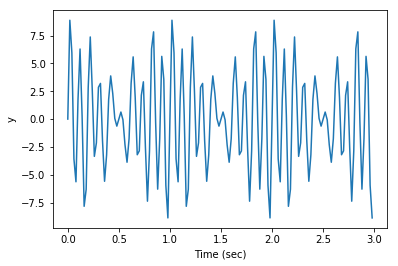

In [113]:
f_s = 50.0 # Hz
f = 1.0 # Hz
time = np.arange(0.0, 3.0, 1/f_s)
y = 5 * np.sin(10 * 2 * np.pi * f * time) + 2 * np.sin(5 * 2 * np.pi * f * time) + 3 * np.sin(11 * 2 * np.pi * f * time)

plt.plot(time, y)
plt.xlabel("Time (sec)")
plt.ylabel("y")
plt.show()

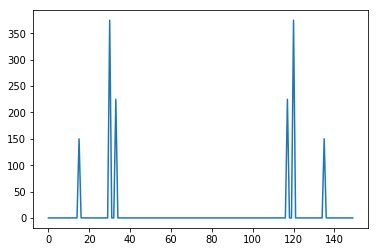

In [114]:
fft_y = np.fft.fft(y)
n = len(fft_y)
freq = np.fft.fftfreq(n, 1/f_s)

plt.plot(np.abs(fft_y))

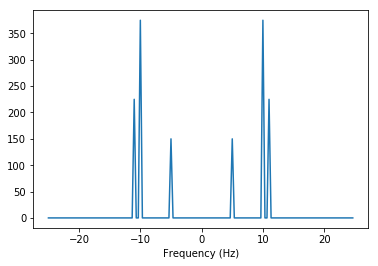

In [115]:
fft_y_shifted = np.fft.fftshift(fft_y)
freq_shifted = np.fft.fftshift(freq)

plt.plot(freq_shifted, np.abs(fft_y_shifted))
plt.xlabel("Frequency (Hz)")
#plt.xlim(0,12)
#plt.xticks(np.arange(0,12, step=1))

plt.show()

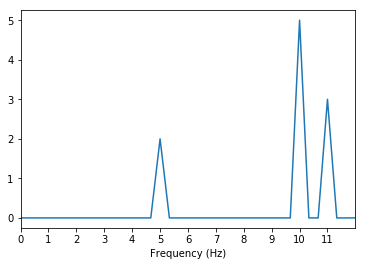

In [116]:
#Take the absolute value and normalize (by dividing by the length)
#then multiply by 2 since we are looking at the one-sided spectra:
fft_y_normal = np.abs(fft_y_shifted/n)*2

plt.plot(freq_shifted, fft_y_normal)
plt.xlabel("Frequency (Hz)")
plt.xlim(0,12)
plt.xticks(np.arange(0,12, step=1))

plt.show()


## Running FFT Tests:

## Step 1: Recreating wave from subexperiment1.

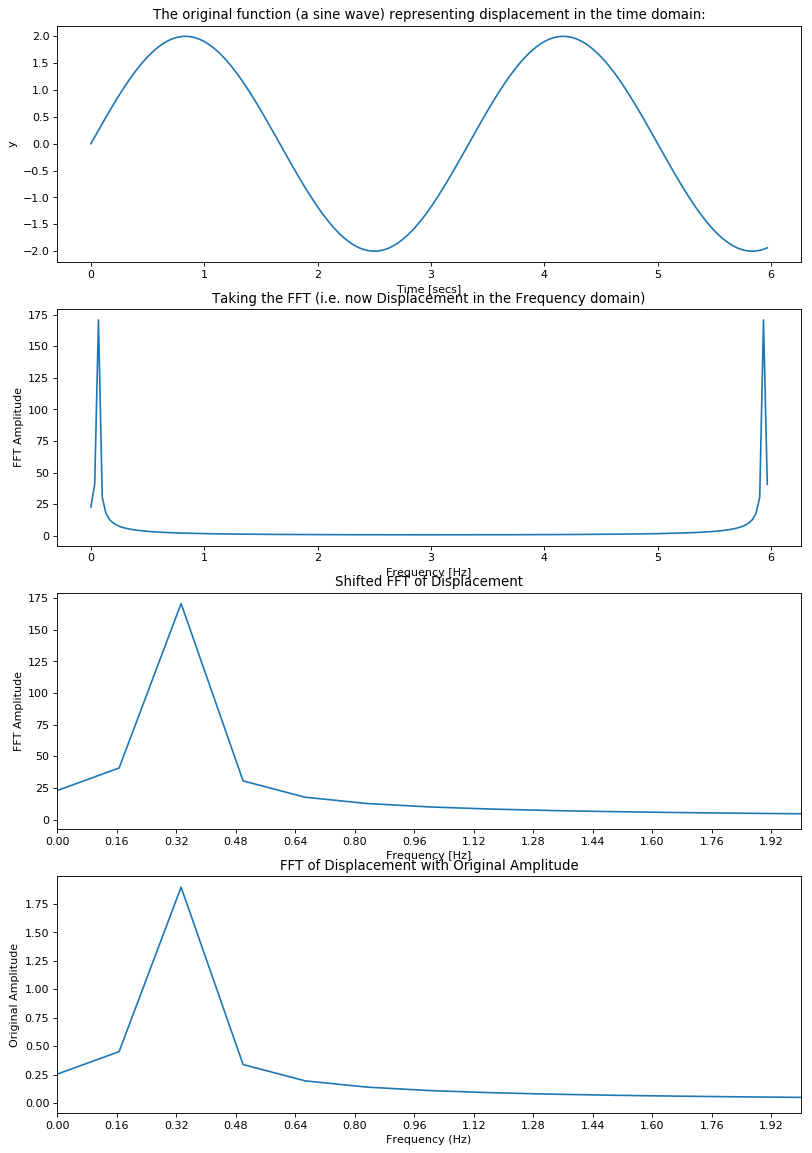

These results make sense actually, since we would expect the FFT to have a peak near 0.16 for this sine wave.


In [124]:
#Step 1:
#Create a normal sine wave (like subexperiment 1) as the displacement over time.
#Amplitude: 1m
#Period: 6 secs --> 1/6 = 0.16 frequency

#Creating the sine wave:
f_s = 30.0  # sampling frequency, Hz
#f = 0.16    # frequency we're looking for in FFT, Hz
time = np.arange(0.0, 6.0, 1/f_s)  #6 second period
#y = 1 * np.sin(2 * np.pi * f * time)   #construction of the sine wave with 1m amplitude

#Test #2:
y = 2 * np.sin(2 * np.pi * f * time)   #construction of the sine wave
f = 0.30
#Here, using 2 to see if we can get back our original amplitude of 2 (using 1m amplitude is less robust).


##Taking the FFT of the sine wave:
fft_y = np.fft.fft(y)
n = len(fft_y)
freq = np.fft.fftfreq(n, 1/f_s)
#plt.plot(np.abs(fft_y))



##Shifting the results of the FFT:
fft_y_shifted = np.fft.fftshift(fft_y)
freq_shifted = np.fft.fftshift(freq)

#Normalizing the results to get original amplitude back:
fft_normal = np.abs(fft_y_shifted/n)*2


#Plotting the results:

fig = plt.figure(num=None, figsize=(12, 18), dpi=80, facecolor='w', edgecolor='k')

# Returns the Axes instance
ax = fig.add_subplot(411) 
ax1 = fig.add_subplot(412) 
ax2 = fig.add_subplot(413) 
ax3 = fig.add_subplot(414)

ax.plot(time, y) #Plotting the first derivative
ax.set_title('The original function (a sine wave) representing displacement in the time domain:')
ax.set_xlabel('Time [secs]')
ax.set_ylabel("y")


ax1.plot(time, np.abs(fft_y)) 
ax1.set_title('Taking the FFT (i.e. now Displacement in the Frequency domain)')
ax1.set_xlabel('Frequency [Hz]')
ax1.set_ylabel('FFT Amplitude')

ax2.plot(freq_shifted, np.abs(fft_y_shifted))
ax2.set_title('Shifted FFT of Displacement')
ax2.set_xlabel('Frequency [Hz]')
ax2.set_ylabel('FFT Amplitude')
ax2.set_xlim(0,2)
ax2.set_xticks(np.arange(0,2, step=.16))

ax3.plot(freq_shifted, fft_normal)
ax3.set_title('FFT of Displacement with Original Amplitude')
ax3.set_xlabel("Frequency (Hz)")
ax3.set_ylabel('Original Amplitude')
ax3.set_xlim(0,2)
ax3.set_xticks(np.arange(0,2, step=.16))


plt.show()

print("These results make sense actually, since we would expect the FFT to have a peak near 0.16 for this sine wave.")

## Step 2: Double derivative to get acceleration.

## Using gradient (instead of interpolation) works, and returns an array:

The graphs of the first and second derivates of the original sine function:


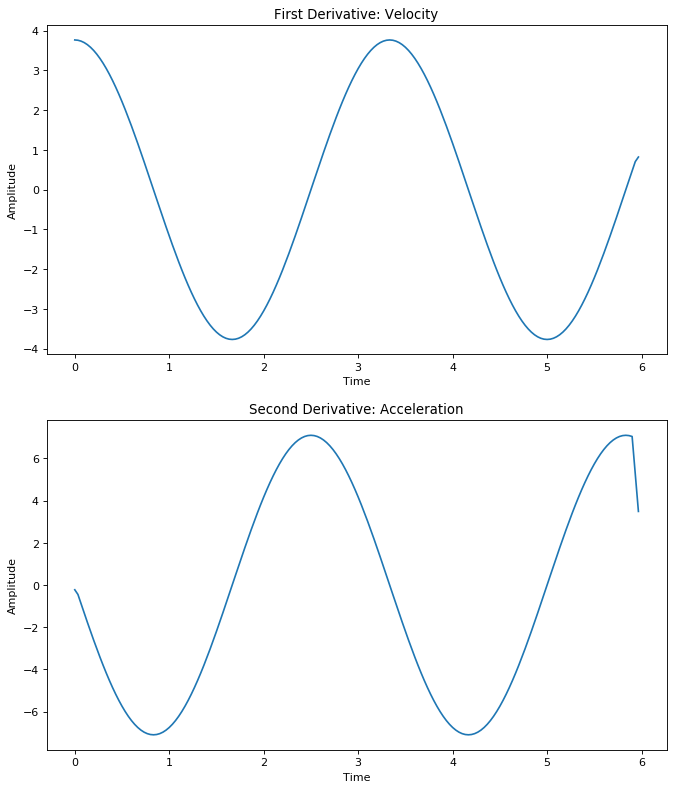

In [125]:
#Trying to do the same experiment, but in a way where 
#we get an array returned so that we can take the FFT later:

print("The graphs of the first and second derivates of the original sine function:")

fp = np.gradient(y, time)
fpp = np.gradient(fp, time)

#Plotting the results:

fig = plt.figure(num=None, figsize=(10, 12), dpi=80, facecolor='w', edgecolor='k')

# Returns the Axes instance
ax = fig.add_subplot(211) 
ax1 = fig.add_subplot(212) 

ax.plot(time, fp) #Plotting the first derivative
ax.set_title('First Derivative: Velocity')
ax.set_xlabel('Time')
ax.set_ylabel('Amplitude')


ax1.plot(time, fpp) # plotting the 2nd derivative
ax1.set_title('Second Derivative: Acceleration')
ax1.set_xlabel('Time')
ax1.set_ylabel('Amplitude')

plt.show()

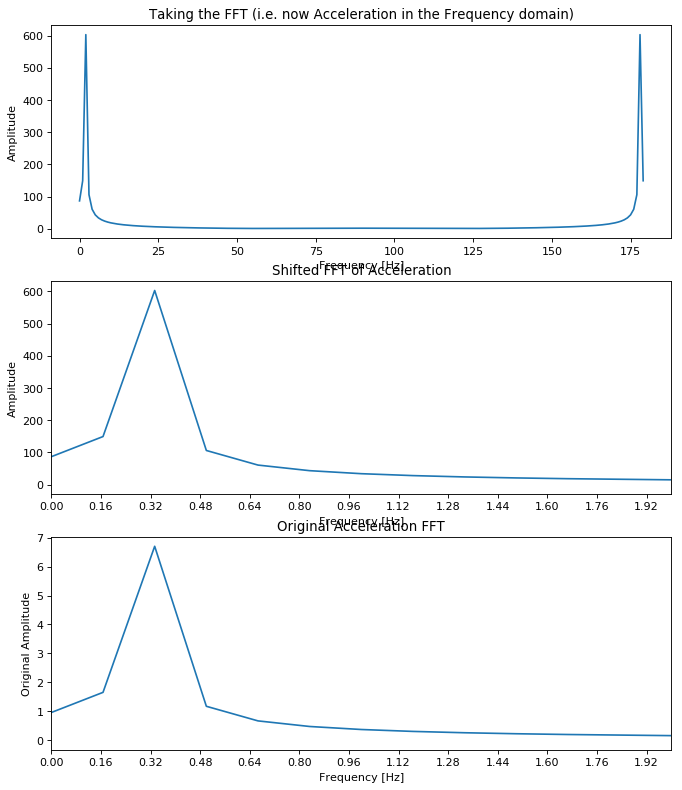

This is the output after shifting the FFT of the second derivative 
 i.e. the FFT of acceleration.
This looks promising since the amplitude of the last graph matches the amplitude of the acceleration graph from the second derivative (above).


In [126]:
#fpp is the second derivative, take the fft:


#Taking the FFT of ffp (the second derivative i.e. acceleration):
fft_fpp = np.fft.fft(fpp)
n_fpp = len(fft_fpp)
freq_fpp = np.fft.fftfreq(n_fpp, 1/f_s)


#Shifting the FFT of acceleration:
fft_fpp_shifted = np.fft.fftshift(fft_fpp)
freq_fpp_shifted = np.fft.fftshift(freq_fpp)

#Normalize:
fft_fpp_normal = np.abs(fft_fpp_shifted/n_fpp)*2



#Plotting the results:

fig = plt.figure(num=None, figsize=(10, 12), dpi=80, facecolor='w', edgecolor='k')


# Returns the Axes instance
ax1 = fig.add_subplot(311) 
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)


ax1.plot(np.abs(fft_fpp))
ax1.set_title('Taking the FFT (i.e. now Acceleration in the Frequency domain)')
ax1.set_xlabel('Frequency [Hz]')
ax1.set_ylabel('Amplitude')

ax2.plot(freq_fpp_shifted, np.abs(fft_fpp_shifted))
ax2.set_title('Shifted FFT of Acceleration')
ax2.set_xlabel('Frequency [Hz]')
ax2.set_ylabel('Amplitude')
ax2.set_xlim(0,2)
ax2.set_xticks(np.arange(0,2, step=.16))

ax3.plot(freq_fpp_shifted, fft_fpp_normal)
ax3.set_title('Original Acceleration FFT')
ax3.set_xlabel('Frequency [Hz]')
ax3.set_ylabel('Original Amplitude')
ax3.set_xlim(0,2)
ax3.set_xticks(np.arange(0,2, step=.16))

plt.show()

print("This is the output after shifting the FFT of the second derivative \n i.e. the FFT of acceleration.")
print("This looks promising since the amplitude of the last graph matches the amplitude of the acceleration graph from the second derivative (above).")





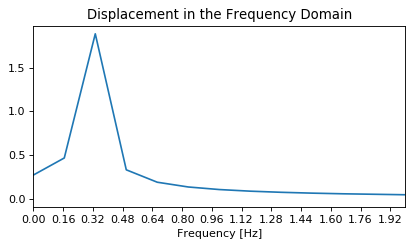

In [127]:
#Now, multiply the accelerations by 1/w^2 to get the displacement in the frequency domain:

w = 2*np.pi*f
omega = 1/w**2

new_list = []

for x in fft_fpp_normal:
    new_x = x*omega
    new_list.append(new_x)
    
#for x,y in zip(fft_fpp_shifted, new_list):
#    print(x,y)

#So now new_list should have the new values, 
#representing displacement in the frequency domain.
fig = plt.figure(num=None, figsize=(6,3), dpi=80, facecolor='w', edgecolor='k')

# Returns the Axes instance
ax = fig.add_subplot(111) 


ax.plot(freq_fpp_shifted, new_list)
ax.set_title("Displacement in the Frequency Domain")
ax.set_xlabel('Frequency [Hz]')
plt.xlim(0,2)
plt.xticks(np.arange(0,2, step=.16))

plt.show()



## Analysis of Results:

In [128]:
from scipy.integrate import simps
from scipy.integrate import cumtrapz
import math

#Print out the x-value corresponding to the FFT peak:
max_y = max(new_list)

for x,y in zip(freq_fpp_shifted, new_list):
    if y == max_y:
        print(x)
        
        
#Try to calculate significant wave height:

##Calculate the mean variance of the sea surface elevation, by taking the integral under the FFT curve
#We only want to integrate while fft_nfreq < 0.6:

def limit_frequency_range(fft_freq):
    ret_freq = []
    for x in fft_freq:
        if x < 0.4:
            ret_freq.append(x)
    return ret_freq

lim_freq1 = limit_frequency_range(freq_fpp_shifted)


#Need to make disp_spectra match length of newly limited frequency:
len1 = len(lim_freq1)

lim_dspectra1 = new_list[0:len1]

m0_1 = simps(y=lim_dspectra1, x=lim_freq1)

Hs1 = 4*math.sqrt(m0_1)

##This is how I would have done it before (from above):
#print("\n")
#print("Calculating Significant Wave Heights:")
#print("Expecting near 1m and got: ", Hs1, "[m]")



##But now that we have original amplitude from the displacement,
#we know that the wave height is that signal height:

print("\n")
print("Calculating Significant Wave Heights:")
print("Expecting near 2m and got: ", max_y, "[m]")

-0.333333333333
0.333333333333


Calculating Significant Wave Heights:
Expecting near 2m and got:  1.88518025883 [m]


## Now recreating wave from subexperiment2:

In [122]:
#Step 1:
#Create a normal sine wave (like subexperiment 2) as the displacement over time.
#Amplitude: 1.5m
#Period: 4 secs --> 1/4 = 0.25 frequency
#Secondary period: 8s of nothing, at an amplitude of 0s


##This one is harder to create actually because the baseline
#signal doesn't really replicate a sine wave, it's more of
#half of a sine wave and then a flat line as one period of it...

#Creating the sine wave:
f_s = 30.0  # sampling frequency, Hz
f = 0.25    # frequency we're looking for in FFT, Hz
time1 = np.arange(0.0, 4.0, 1/f_s)  #6 second period
time2 = np.arrange(0.0, 8.0, 1/f_s)
y1 = np.sin(2 * np.pi * 0.25 * time1)  #construction of the sine wave
y2 = np.sin(2 * np.pi * 0 * time2) 
y = y1 + y2

##Taking the FFT of the sine wave:
fft_y = np.fft.fft(y)
n = len(fft_y)
freq = np.fft.fftfreq(n, 1/f_s)
#plt.plot(np.abs(fft_y))



##Shifting the results of the FFT:
fft_y_shifted = np.fft.fftshift(fft_y)
freq_shifted = np.fft.fftshift(freq)

#Normalizing the results to get original amplitude back:
fft_normal = np.abs(fft_y_shifted/n)*2

AttributeError: module 'numpy' has no attribute 'arrange'